In [1]:


from utils import *

%matplotlib inline
# jupyters notebook Befehl zum direkten Anzeigen von Matplotlib Diagrammen
plt.rcParams['figure.figsize'] = (9, 6)
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
colormap={0:'red',1:'green'}
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True 
plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.major.size'] = plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['font.size'] = 12

from dust_extinction.parameter_averages import G23 as ext_model


Here you have to set the path where the files are

In [2]:

dust_path='./Q-curves/fitting-Qcurves/Q_GRF/'
slab_folder='/data/tk502/LineData/'

In [3]:
old_version=False
continuum_penalty=False
radial_version=True
save_mol_flux=False

# examples

Below you find a list of use cases for the model

## Varibale dicts

First you see example dictonaries with all the input parameters

- distance: distance to object in pc


- tstar: stellar temperature in Kelvin
- rstar: stellar radius in solar radii
- bb_star: bool, True: using the stellar temperature to create a Black body, False: using input spectum (read_data(stellar_file))


- if t_rim is set: rim is black body with temperature t_rim


- if tmax_rim, tmin_rim, and q_rim are set: rim is temperature power law distribution


    - tmax_rim: maximum temperature of inner rim
    - tmin_rim: minimum temperature of inner rim
    - q_rim: exponent of the temperature powerlaw distribution
    - sc_rim: scale factor of the rim

- tmax_mp: maximum temperature of midplane
- tmin_mp: minimum temperature of midplane
- q_mid: exponent of the temperature powerlaw distribution
- sc_mid: scale factor of the midplane


- tmax_s: maximum temperature of surface layer
- tmin_s: minimum temperature of surface layer
- q_thin: exponent of the temperature powerlaw distribution

- the species (their Q-files) and their scaling factors (sc) are defined in dust_species

- q_emis: exponent of the temperature powerlaw distribution for the molecular layer




In [4]:
# this dictionary has a single temperature for the inner rim
var_dict={'tstar':9000,
         'rstar':2.5,
         'distance':140,
         't_rim':1500.6,
         'tmin_s':50.3,
         'tmax_s':1000.1,
         'tmin_mp':99.3,
         'tmax_mp':1100.4,
         'sc_ir':1e-16,
         'sc_mid':1e-6,
         'q_mid':-0.6,
         'q_thin':-0.55,
#         'q_emis':-0.55,
         'q_emis':-0.8842653,
         'bb_star':True,
         'incl':0.0,
         'Rv':3.1,
         'E(B-V)':0.5
         }


## Abundance dict

The second dictonary that is needed to run the model is the abundance_dict.

It sets what dust components are used and their scale factors.

The names of the species should be their file names.

with dust_path you can specify the folder in which there files are


In [5]:
#here all factors are the same, but they can be different of course
test_fac=1e-6

abundance_dict={'MgOlivine0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgOlivine1.0.Combined.Kappa_rv1.0.dat',
                'MgOlivine2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgOlivine3.0.Combined.Kappa_rv3.0.dat',
                #'MgOlivine4.0.Combined.Kappa_rv4.0.dat',
                'MgOlivine5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'MgPyroxene0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgPyroxene1.0.Combined.Kappa_rv1.0.dat',
                'MgPyroxene2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgPyroxene3.0.Combined.Kappa_rv3.0.dat',
                #'MgPyroxene4.0.Combined.Kappa_rv4.0.dat',
                'MgPyroxene5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'Silica0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Silica1.0.Combined.Kappa_rv1.0.dat',
                'Silica2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Silica3.0.Combined.Kappa_rv3.0.dat',
                #'Silica4.0.Combined.Kappa_rv4.0.dat',
                'Silica5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Enstatite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Enstatite1.0.Combined.Kappa_rv1.0.dat',
                'Enstatite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Enstatite3.0.Combined.Kappa_rv3.0.dat',
                #'Enstatite4.0.Combined.Kappa_rv4.0.dat',
                'Enstatite5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Forsterite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Forsterite1.0.Combined.Kappa_rv1.0.dat',
                'Forsterite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Forsterite3.0.Combined.Kappa_rv3.0.dat',
                #'Forsterite4.0.Combined.Kappa_rv4.0.dat',
                'Forsterite5.0.Combined.Kappa_rv5.0.dat':test_fac}

# Slab dict

The third dictonary needed to run the model is the slab dict.

It contains all molecules for which the emission should be included in the model

Every molecule has a column density range, a temperature range and an emitting radius (scale factor).  
You can also run it with a single value for the column density or a single value for both temperature and column density.

- ColDens: fixed column density  
or  
- ColDens_tmin: column density at tmin
- ColDenstmax: column density at tmax

- temis: emission temperature  
or   
- tmin: minimum emission temperature
- tmax: maximum emission temperature

- radius: inner radius where the temperature power law starts (for t-ranges), for single value temperatures it is the radius of the emitting area

In [6]:
slab_dict={
            'CO2':{'ColDens':1e18,
                    'tmax':500,
                    'tmin':200,
                     'radius':0.3
                    },
#            'H2O':{'ColDens_tmax':1e18,
#                   'ColDens_tmin':5e17,
#                    'tmax':921.1,
#                    'tmin':221,
#                    'r_area':1
#                    },
    
            'H2O':{'ColDens':1e24,
                    'tmax':921.1,
                    'tmin':221,
                    'r_area':1
                    },

          }

slab_dict={'H2O': {'ColDens_tmin': 1.0520619671395424e+17, 'ColDens_tmax': 4.6799618150106105e+21, 'tmin': 277.4153, 'r_area': 1.0, 'tmax': 407.92474, 'radius': 0.8476288896724117}}


## running the model

To run the model you need to do 3 steps

- initialize
- read in the data
- run the model

### step one

initializing is done with
continuum_model()

you should save that under a name ({name_model})


In [7]:

mod=complete_model()


In [8]:
# creating a wavelength grid on which the fluxes are calculated
wavelength=generate_grid(lambda_0=4.9,lambda_n=28,R=500)

In [9]:
#wavelength=10**np.linspace(np.log10(4),np.log10(30),5000)
print(len(wavelength))
mod.read_data(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,wavelength_points=wavelength,
              slab_prefix='12_',save_binned_data=True,load_binned_data=True,slab_folder=slab_folder,dust_path=dust_path,ext_model=ext_model)


873
Folder to be searched for pre-binned data:
['/data/tk502/LineData//binned_data/0', '/data/tk502/LineData//binned_data/1', '/data/tk502/LineData//binned_data/10', '/data/tk502/LineData//binned_data/11', '/data/tk502/LineData//binned_data/12', '/data/tk502/LineData//binned_data/2', '/data/tk502/LineData//binned_data/3', '/data/tk502/LineData//binned_data/4', '/data/tk502/LineData//binned_data/5', '/data/tk502/LineData//binned_data/6', '/data/tk502/LineData//binned_data/7', '/data/tk502/LineData//binned_data/8', '/data/tk502/LineData//binned_data/9']
Searching:
/data/tk502/LineData//binned_data/0/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/1/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/10/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/11/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/12/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/2/wavelength.npy
True
-----------------------------
Found p

/home/links/tk502/miniconda3/envs/duckling/lib/python3.9/site-packages/dust_extinction/helpers.py:30: UserWarning: x has no units, assuming x units are inverse microns
  warnings.warn(


--------------
!   Done     !
--------------


### Running the model


Init 0.0007202625274658203
Star 0.0002722740173339844
Inner rim 0.00015687942504882812
Midplane 0.0023550987243652344
Surface 0.0009772777557373047
Emission 0.0045583248138427734
Summing up 7.414817810058594e-05


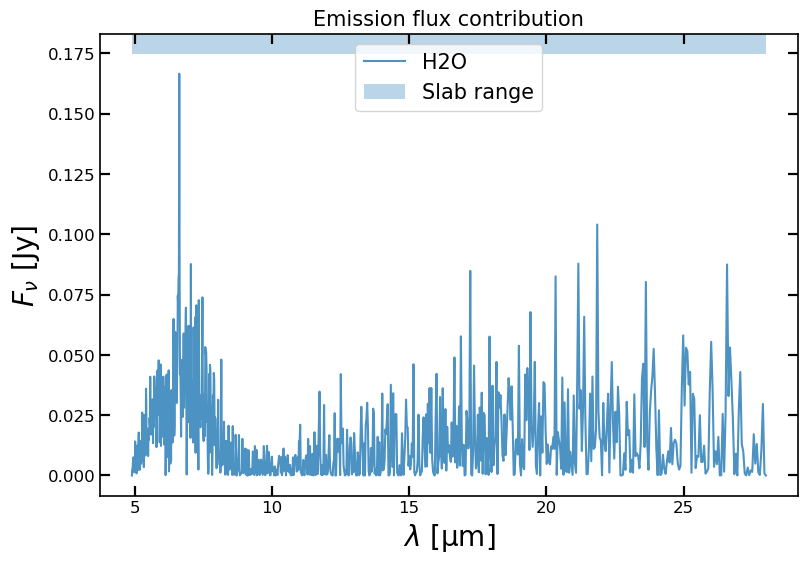

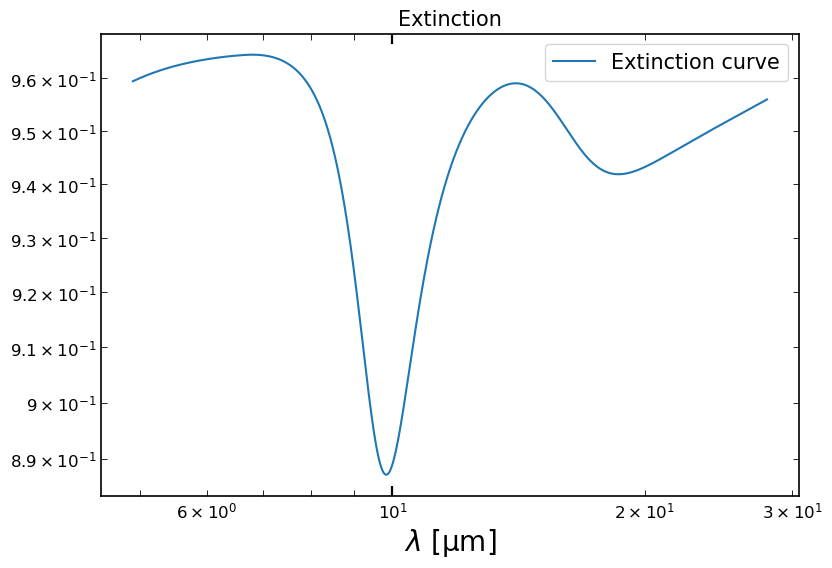

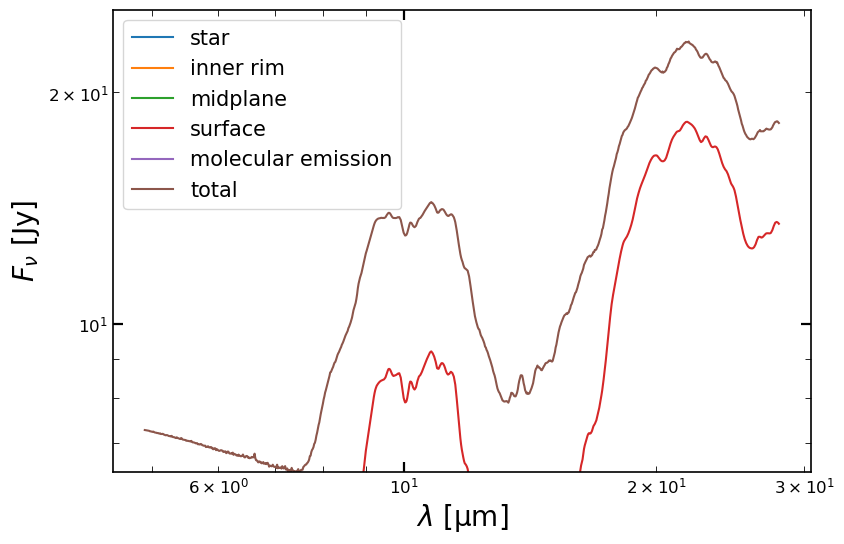

In [10]:

mod.run_model(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,output_all=False,timeit=True)
mod.plot() #this plots the final model


# Exploring the model

-----------
H2O
ColDens_tmin 277.4153
ColDens_slope 27.75880022906262
logColDens_min 17.02204132080078
inner_part_temp [325 350 375]
inner_part [1.95691484e-15 4.46723231e-15 8.91627840e-15]
upper_in_temp 400
lower_in_temp 300
upper_in 7.66598852008457e-15
lower_in 3.2735145746666867e-16
lower_out_temp 277.4153
upper_out_temp 407.92474
lower_out 3.5719359260216965e-16
upper_out 5.270823170987074e-15
-----------
----------------
Keys in output dict
H2O
ColDens_tmin
277.4153
ColDens_slope
27.75880022906262
logColDens_min
17.02204132080078
inner_part_temp
[325 350 375]
inner_part
[1.95691484e-15 4.46723231e-15 8.91627840e-15]
upper_in_temp
400
lower_in_temp
300
upper_in
7.66598852008457e-15
lower_in
3.2735145746666867e-16
lower_out_temp
277.4153
upper_out_temp
407.92474
lower_out
3.5719359260216965e-16
upper_out
5.270823170987074e-15
-----------
H2O
Contributing to total flux: inner_part
Contributing to total flux: upper_in
Contributing to total flux: lower_in
Contributing to total flux: 

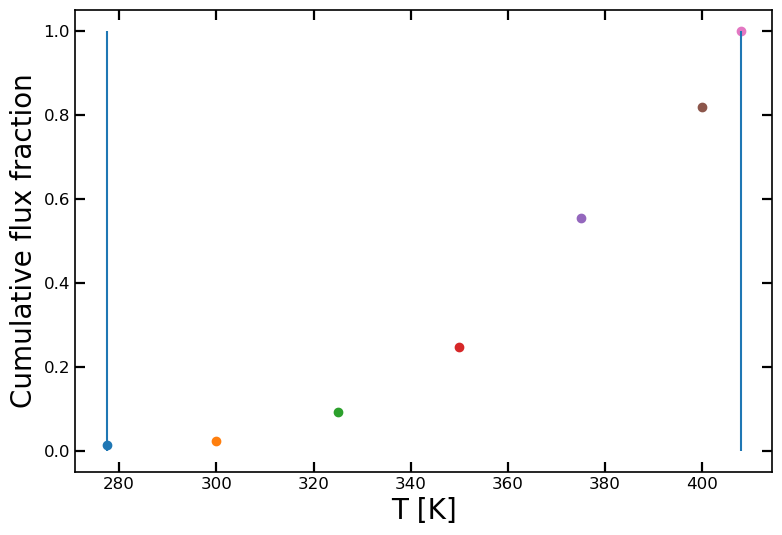

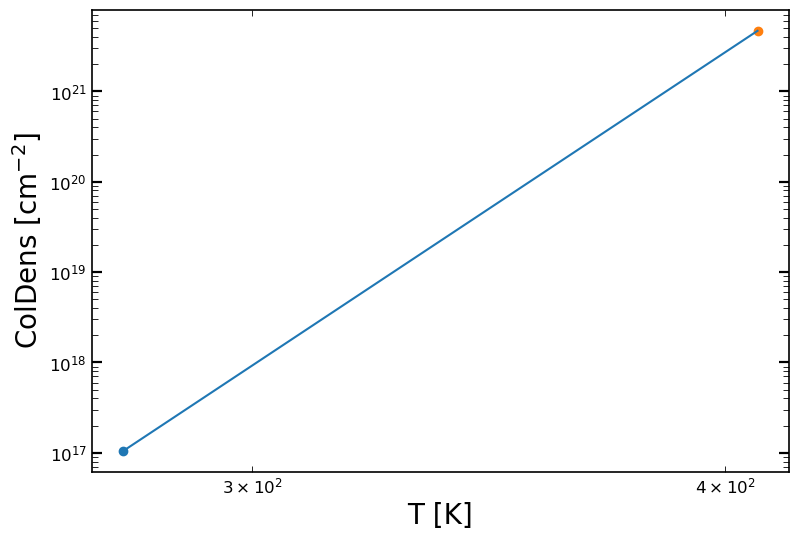

tmax,tmin 407.92474 277.4153
t at max,t at min 407.92474 277.4153
total radial range
0.8476288896724117 1.3109060991756756


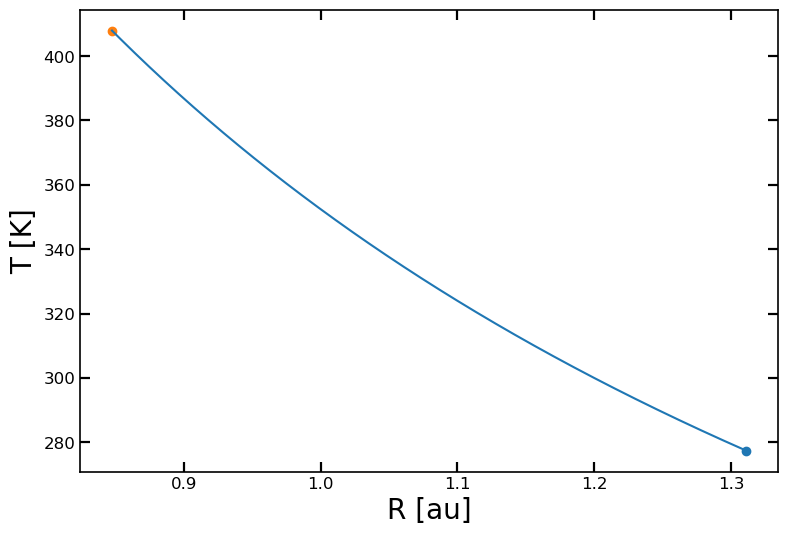

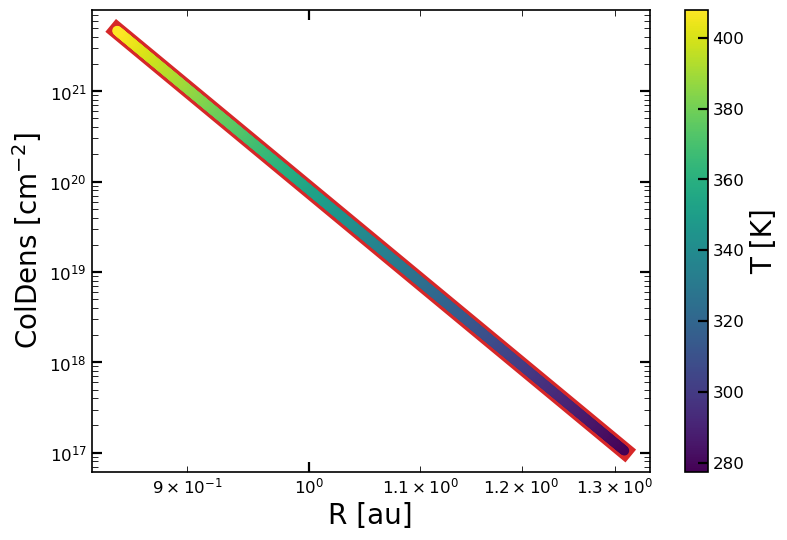

Exp -24.54614381219209
dens_min 1.0520619671395422e+17
dens_min calculate 1.0520619671395608e+17
Calculate mass
min_lim 277.4153 max_lim 300
limits [0, 300]
rlow in au 1.3109060991756756
rhigh in au 1.1998637647229886
cmax 4.67996181501061e+21
dens at rlow calculate 1.0520619671395608e+17
dens at rhigh calculate 9.238179581617459e+17
mass inf mearth
min_lim 300 max_lim 407.92474
limits [300, 2000]
rlow in au 1.1998637647229886
rhigh in au 0.8476288896724119
cmax 4.67996181501061e+21
dens at rlow calculate 9.238179581617459e+17
dens at rhigh calculate 4.6799618150105843e+21
mass inf mearth


/reduce/home/tk502/DuCKLinG/utils.py:3231: RuntimeWarning: overflow encountered in scalar power
  mass=np.pi *cmax*(rin*self.au)**(-slope)*(rlow**(slope+2)-rhigh**(slope+2))/(slope+2)*mass_single_mol/unit
/reduce/home/tk502/DuCKLinG/utils.py:3248: RuntimeWarning: invalid value encountered in scalar divide
  mass_dict[mol][f'{str(temp_brackets[i])}_{str(temp_brackets[j])}']=float(mass_list[i]/mass_list[j])


{'H2O': {'mass_list': [inf, inf],
  'temp_brakets': [300, 2000],
  '[0, 300]_[300, 2000]': nan}}

In [11]:
mod.calc_mol_masses(temp_brackets=[[0,300],[300,2000]],low_contribution=0.0,high_contribution=1.0,debug=True)

-----------
H2O
ColDens_tmin 277.4153
ColDens_slope 27.75880022906262
logColDens_min 17.02204132080078
inner_part_temp [325 350 375]
inner_part [1.95691484e-15 4.46723231e-15 8.91627840e-15]
upper_in_temp 400
lower_in_temp 300
upper_in 7.66598852008457e-15
lower_in 3.2735145746666867e-16
lower_out_temp 277.4153
upper_out_temp 407.92474
lower_out 3.5719359260216965e-16
upper_out 5.270823170987074e-15
-----------
----------------
Keys in output dict
H2O
ColDens_tmin
277.4153
ColDens_slope
27.75880022906262
logColDens_min
17.02204132080078
inner_part_temp
[325 350 375]
inner_part
[1.95691484e-15 4.46723231e-15 8.91627840e-15]
upper_in_temp
400
lower_in_temp
300
upper_in
7.66598852008457e-15
lower_in
3.2735145746666867e-16
lower_out_temp
277.4153
upper_out_temp
407.92474
lower_out
3.5719359260216965e-16
upper_out
5.270823170987074e-15
-----------
H2O
Contributing to total flux: inner_part
Contributing to total flux: upper_in
Contributing to total flux: lower_in
Contributing to total flux: 

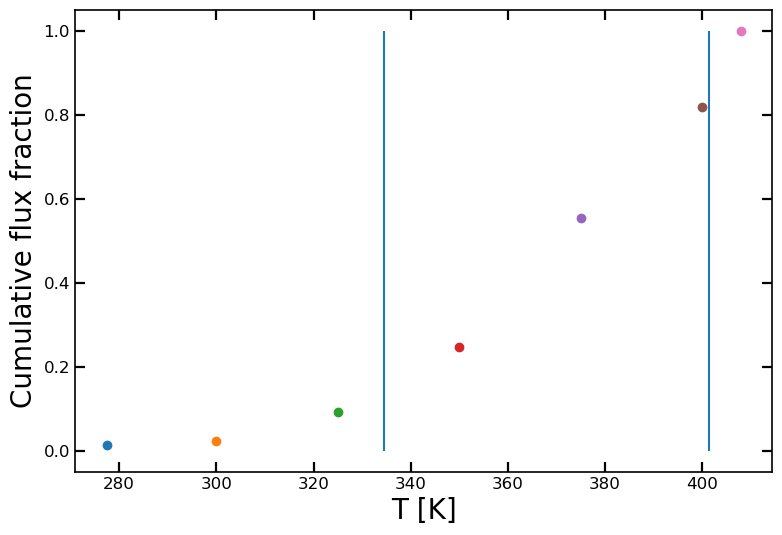

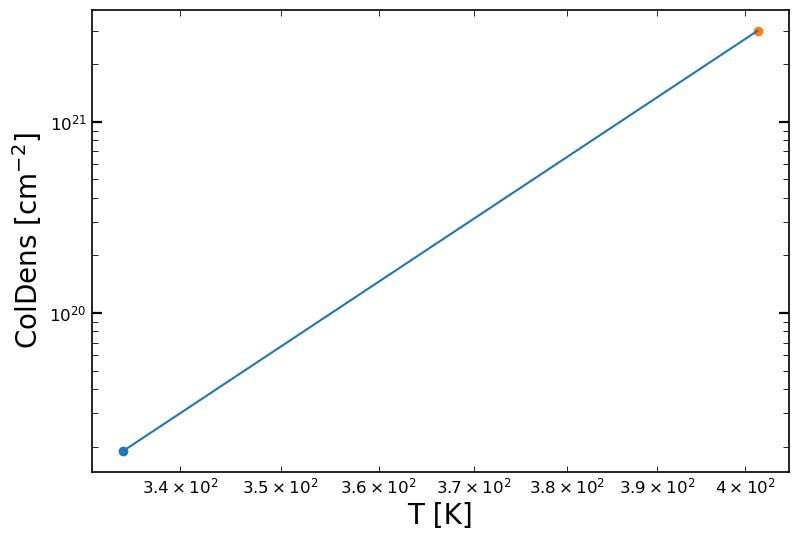

tmax,tmin 407.92474 277.4153
t at max,t at min 401.39308676883564 334.5294319492361
total radial range
0.8476288896724117 1.3109060991756756


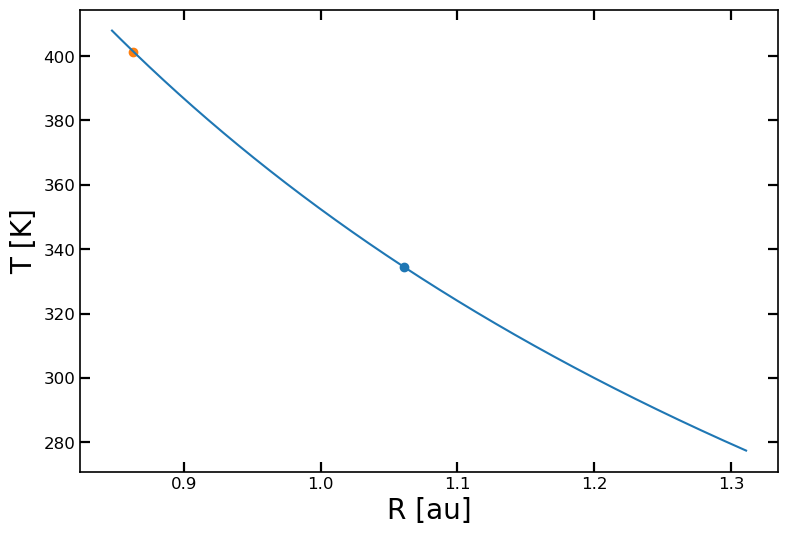

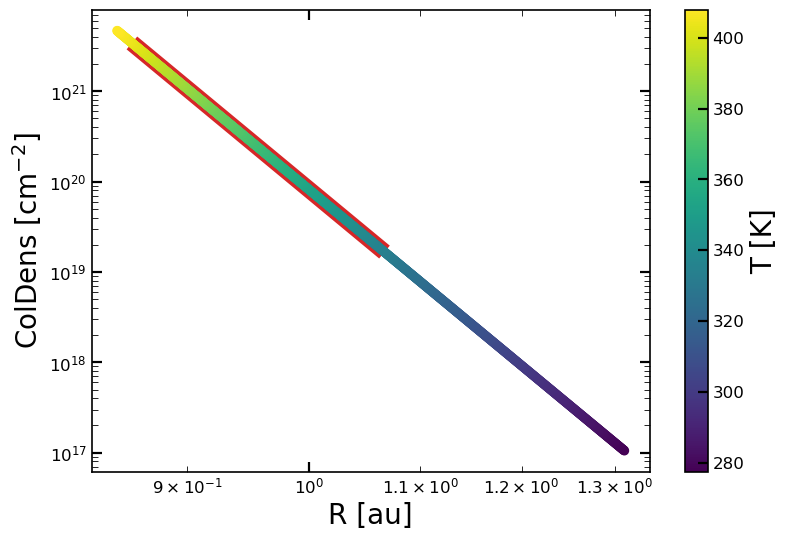

{'H2O': {'radius_eff': 0.6164983305860778,
  'tmin,tmax': [334.5294319492361, 401.39308676883564],
  'cmin,cmax': [1.9008186771972317e+19, 2.989845588612791e+21],
  'rout,rin': [1.0607826647778957, 0.8632436911312312]}}

In [12]:
#calculating where the emission in the model is coming from
mod.extract_emission_quantities(debug=True)

In [13]:
#calculating the integrated flux of a molecule in a certain wavelength range
mod.calc_integrated_flux('H2O',wave_lims=[14,16])

3.4015849233423347e-16

In [14]:
mod.calc_dust_masses(dust_path=dust_path,unit='msun')

{'MgOlivine0.1.Combined.Kappa_rv0.1.dat': 8.248652177652694e-06,
 'MgOlivine2.0.Combined.Kappa_rv2.0.dat': 0.0001649730435530539,
 'MgOlivine5.0.Combined.Kappa_rv5.0.dat': 0.00041243260888263475,
 'MgPyroxene0.1.Combined.Kappa_rv0.1.dat': 7.114740422773216e-06,
 'MgPyroxene2.0.Combined.Kappa_rv2.0.dat': 0.00014229480845546428,
 'MgPyroxene5.0.Combined.Kappa_rv5.0.dat': 0.0003557370211386607,
 'Silica0.1.Combined.Kappa_rv0.1.dat': 4.913617604477751e-06,
 'Silica2.0.Combined.Kappa_rv2.0.dat': 9.8272352089555e-05,
 'Silica5.0.Combined.Kappa_rv5.0.dat': 0.00024568088022388756,
 'Enstatite0.1.Combined.Kappa_rv0.1.dat': 6.225397869926561e-06,
 'Enstatite2.0.Combined.Kappa_rv2.0.dat': 0.00012450795739853124,
 'Enstatite5.0.Combined.Kappa_rv5.0.dat': 0.00031126989349632806,
 'Forsterite0.1.Combined.Kappa_rv0.1.dat': 7.337076060984878e-06,
 'Forsterite2.0.Combined.Kappa_rv2.0.dat': 0.00014674152121969754,
 'Forsterite5.0.Combined.Kappa_rv5.0.dat': 0.00036685380304924385}

here you can check how long the model needs to run

In [15]:
%timeit mod.run_model(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,output_all=False,timeit=False)


2.28 ms ± 78.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Retrieving linear parameters

We are creating new dictionaries that don't include the linear parameters and then we try to determine than using the method that is used during the retrieval

In [16]:
var_dict_new=var_dict
abundance_dict_new={}
for key in abundance_dict:
    abundance_dict_new[key]=None


slab_dict_new=slab_dict
for key in slab_dict:
    slab_dict_new[key]['radius']=None

In [17]:
mod2=complete_model()
mod2.read_data(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,wavelength_points=wavelength,
              slab_prefix='12_',save_binned_data=True,load_binned_data=True,slab_folder=slab_folder,dust_path=dust_path,ext_model=ext_model)


Folder to be searched for pre-binned data:
['/data/tk502/LineData//binned_data/0', '/data/tk502/LineData//binned_data/1', '/data/tk502/LineData//binned_data/10', '/data/tk502/LineData//binned_data/11', '/data/tk502/LineData//binned_data/12', '/data/tk502/LineData//binned_data/2', '/data/tk502/LineData//binned_data/3', '/data/tk502/LineData//binned_data/4', '/data/tk502/LineData//binned_data/5', '/data/tk502/LineData//binned_data/6', '/data/tk502/LineData//binned_data/7', '/data/tk502/LineData//binned_data/8', '/data/tk502/LineData//binned_data/9']
Searching:
/data/tk502/LineData//binned_data/0/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/1/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/10/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/11/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/12/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/2/wavelength.npy
True
-----------------------------
Found pre-b

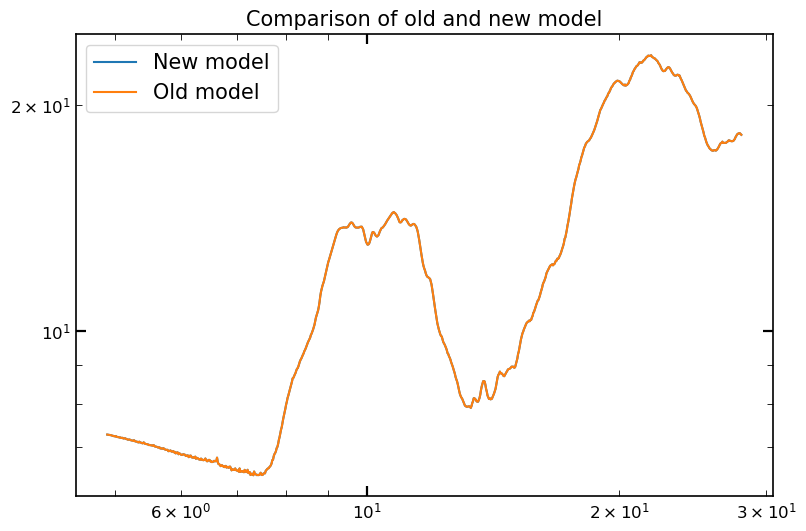

In [18]:
tot_flux_new=mod2.run_fitted_to_obs(variables=var_dict,dust_species=abundance_dict_new,slab_dict=slab_dict_new,flux_obs=mod.tot_flux,lam_obs=mod.xnew,interp=False,debug=False)
plt.title('Comparison of old and new model')
plt.loglog(mod2.xnew,tot_flux_new,label='New model')
plt.loglog(mod.xnew,mod.tot_flux,label='Old model')
plt.legend()
plt.show()

the differences between the old and new model are only extremly small

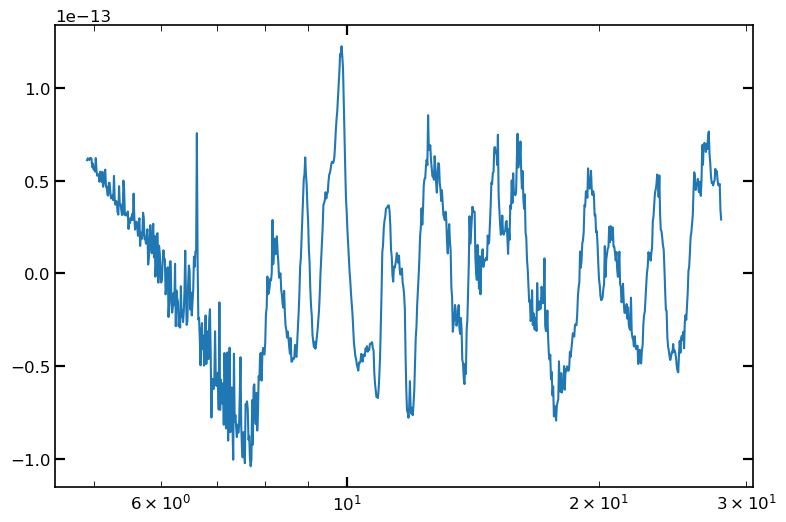

In [19]:
plt.plot(mod.xnew,(mod.tot_flux-tot_flux_new)/tot_flux_new,label='Difference')
plt.xscale('log')
plt.show()

In [20]:
print('Determined scale factors')
print(mod2.scaleparas)

Determined scale factors
[1.00000000e-16 1.00000000e-06 9.99999999e-07 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 7.18474735e-01]


In [21]:
%timeit mod2.run_fitted_to_obs(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict_new,flux_obs=mod.tot_flux,lam_obs=mod.xnew,interp=False,debug=False)


36.6 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
#np.save('./Observations/mock_observation_extinction_flux',mod.tot_flux)
#np.save('./Observations/mock_observation_extinction_wave',mod.xnew)
#np.save('./Observations/mock_observation_flux',mod.tot_flux)
#np.save('./Observations/mock_observation_wave',mod.xnew)

## Molecular absorption

Instead of adding molecular emission to the model, you can also subtract said data to emulate absorption features

Just like for molecular emission, you can choose 0D slabs, 1D temperature power laws and temperature + column density power laws for the molecular absorption.  
If you are using multiple components name them 'molname_absorp_comp2', 'molname_absorp_comp3' ...

In [23]:
# this dictionary has a single temperature for the inner rim
var_dict={'tstar':9000,
         'rstar':2.5,
         'distance':140,
         't_rim':1500.6,
         'tmin_s':50.3,
         'tmax_s':1000.1,
         'tmin_mp':99.3,
         'tmax_mp':1100.4,
         'sc_ir':1e-16,
         'sc_mid':1e-6,
         'q_mid':-0.6,
         'q_thin':-0.55,
         'q_emis':-0.55,
         'bb_star':True,
         'incl':0.0
         }


In [24]:
slab_dict={'H2O_absorp':{'ColDens_tmax':1e17,
                         'ColDens_tmin':1e16,
                         'tmax':800,
                         'tmin':100,
                         'radius':1.0
                          }
          }

In [25]:

mod=complete_model()


In [26]:
# creating a wavelength grid on which the fluxes are calculated
wavelength=generate_grid(lambda_0=4.9,lambda_n=28,R=500)
#wavelength=10**np.linspace(np.log10(4),np.log10(30),5000)
print(len(wavelength))
mod.read_data(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,wavelength_points=wavelength,
              slab_prefix='12_',save_binned_data=True,load_binned_data=True,slab_folder=slab_folder,dust_path=dust_path,ext_model=ext_model)


873
Folder to be searched for pre-binned data:
['/data/tk502/LineData//binned_data/0', '/data/tk502/LineData//binned_data/1', '/data/tk502/LineData//binned_data/10', '/data/tk502/LineData//binned_data/11', '/data/tk502/LineData//binned_data/12', '/data/tk502/LineData//binned_data/2', '/data/tk502/LineData//binned_data/3', '/data/tk502/LineData//binned_data/4', '/data/tk502/LineData//binned_data/5', '/data/tk502/LineData//binned_data/6', '/data/tk502/LineData//binned_data/7', '/data/tk502/LineData//binned_data/8', '/data/tk502/LineData//binned_data/9']
Searching:
/data/tk502/LineData//binned_data/0/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/1/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/10/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/11/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/12/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/2/wavelength.npy
True
-----------------------------
Found p

Init 4.100799560546875e-05
Star 0.0014858245849609375
Inner rim 0.0001895427703857422
Midplane 0.0006620883941650391
Surface 0.0005829334259033203
Emission 0.0013737678527832031
Summing up 5.1975250244140625e-05


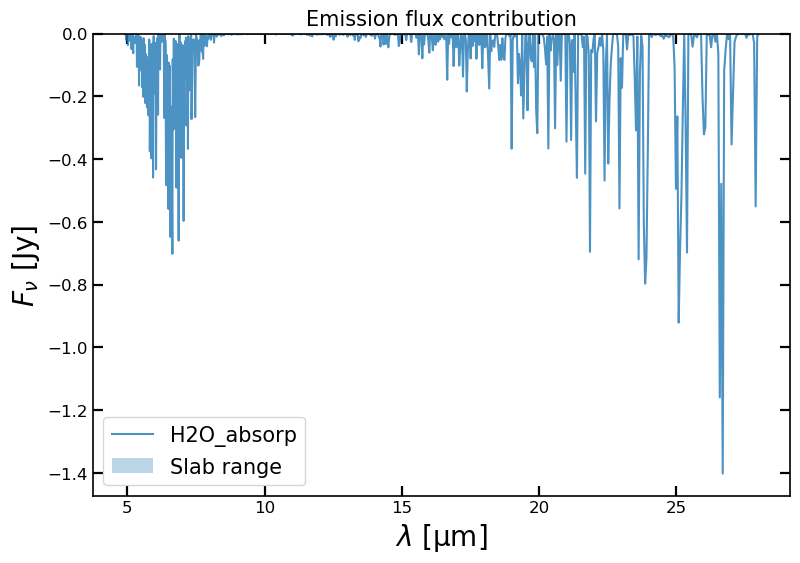

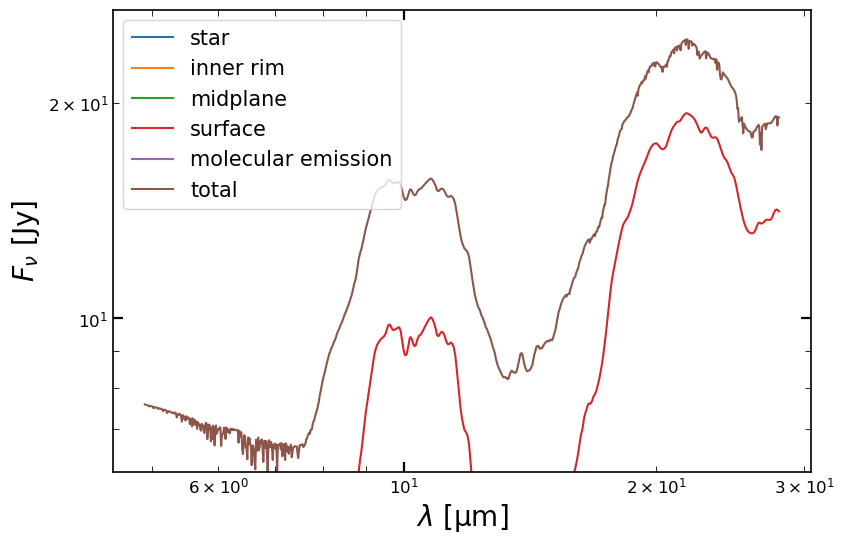

In [27]:

mod.run_model(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,output_all=False,timeit=True)
mod.plot() #this plots the final model


-----------
H2O_absorp
ColDens_tmin 100
ColDens_slope 1.107309364962454
logColDens_min 16.0
inner_part_temp [125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 525 550
 575 600 625 650 675 700 725 750 775]
inner_part [-9.14995321e-22 -2.06212367e-21 -3.86279030e-21 -6.52790992e-21
 -1.01784071e-20 -1.47622185e-20 -2.00118074e-20 -2.54554405e-20
 -3.07347516e-20 -3.56333896e-20 -4.00085371e-20 -4.38018759e-20
 -4.67328117e-20 -4.91155243e-20 -5.10019341e-20 -5.24447963e-20
 -5.34945564e-20 -5.41978927e-20 -5.45167069e-20 -5.44511237e-20
 -5.41768007e-20 -5.37216275e-20 -5.31100176e-20 -5.23635694e-20
 -5.15015885e-20 -5.05414797e-20 -4.94990306e-20]
upper_in_temp 800
lower_in_temp 100
upper_in -2.4194306408266682e-20
lower_in -1.4101094701712376e-22
lower_out_temp 100
upper_out_temp 800
lower_out 0.0
upper_out 0.0
-----------
----------------
Keys in output dict
H2O_absorp
ColDens_tmin
100
ColDens_slope
1.107309364962454
logColDens_min
16.0
inner_part_temp
[125 150 175 200 

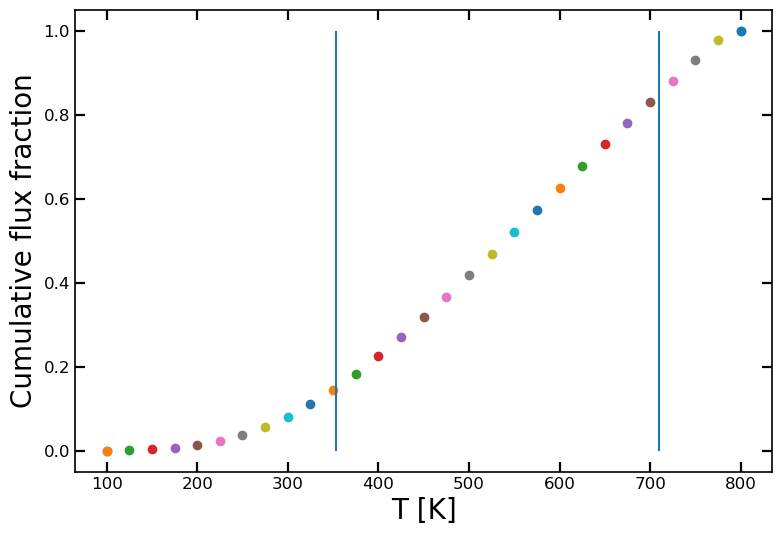

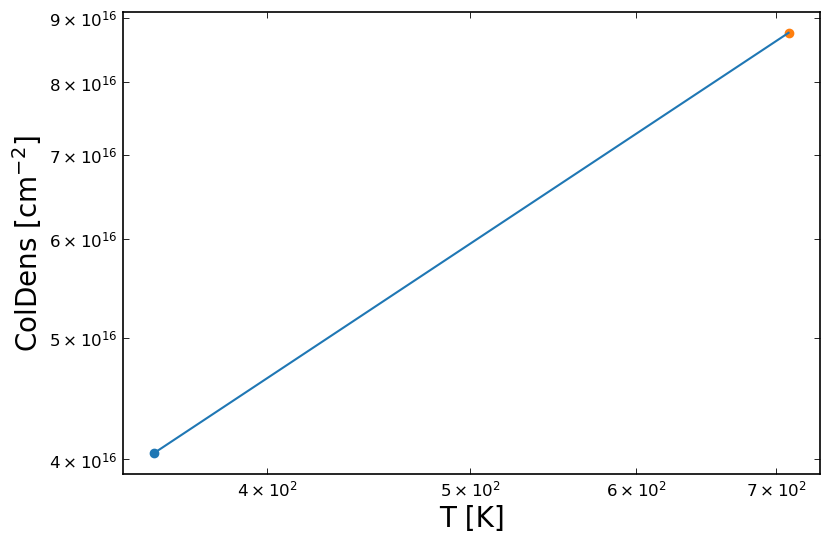

tmax,tmin 800 100
t at max,t at min 709.6417179007993 353.4923851260847
total radial range
1.0 43.85123151104395


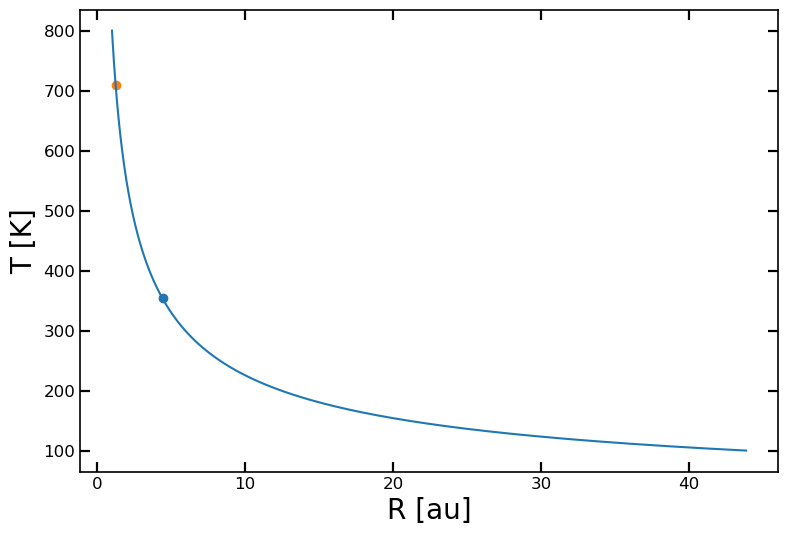

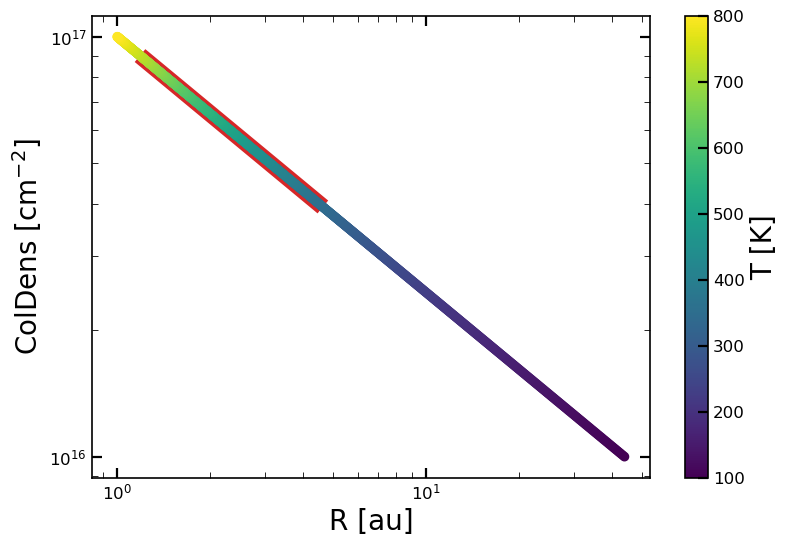

{'H2O_absorp': {'radius_eff': 4.236232780100013,
  'tmin,tmax': [353.4923851260847, 709.6417179007993],
  'cmin,cmax': [4.047868346728136e+16, 8.757166521222886e+16],
  'rout,rin': [4.414963678357704, 1.2434774280315286]}}

In [28]:
#calculating where the emission in the model is coming from
mod.extract_emission_quantities(debug=True)

In [29]:
#calculating the integrated flux of a molecule in a certain wavelength range
mod.calc_integrated_flux('H2O_absorp',wave_lims=[14,16])

-2.759633999989284e-16

In [30]:
%timeit mod.run_model(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,output_all=False,timeit=False)


2.42 ms ± 71.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### showing the retrieval of linear parameters

Folder to be searched for pre-binned data:
['/data/tk502/LineData//binned_data/0', '/data/tk502/LineData//binned_data/1', '/data/tk502/LineData//binned_data/10', '/data/tk502/LineData//binned_data/11', '/data/tk502/LineData//binned_data/12', '/data/tk502/LineData//binned_data/2', '/data/tk502/LineData//binned_data/3', '/data/tk502/LineData//binned_data/4', '/data/tk502/LineData//binned_data/5', '/data/tk502/LineData//binned_data/6', '/data/tk502/LineData//binned_data/7', '/data/tk502/LineData//binned_data/8', '/data/tk502/LineData//binned_data/9']
Searching:
/data/tk502/LineData//binned_data/0/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/1/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/10/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/11/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/12/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/2/wavelength.npy
True
-----------------------------
Found pre-b

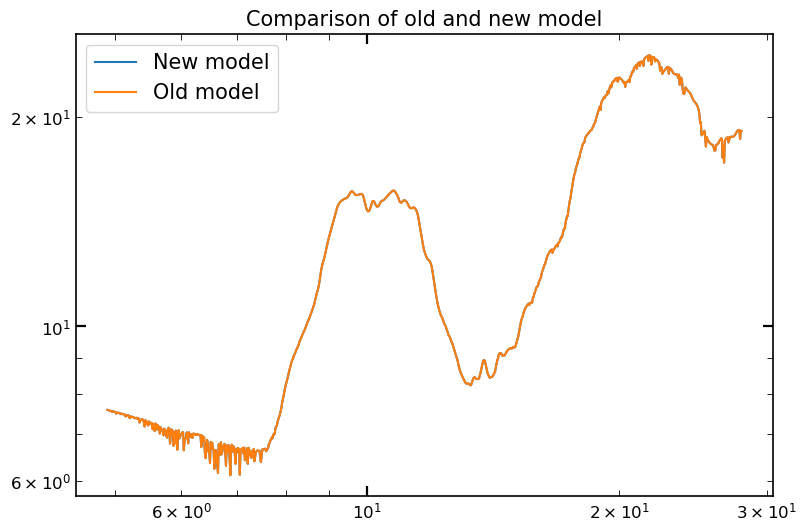

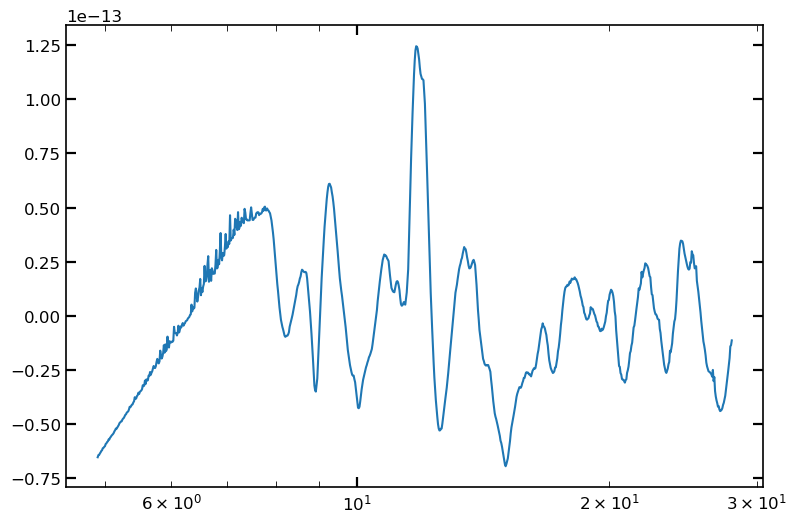

Determined scale factors
[1.e-16 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06
 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e+00]


In [31]:
var_dict_new=var_dict
abundance_dict_new={}
for key in abundance_dict:
    abundance_dict_new[key]=None


slab_dict_new=slab_dict
for key in slab_dict:
    slab_dict_new[key]['radius']=None
    mod2=complete_model()
mod2.read_data(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,wavelength_points=wavelength,
              slab_prefix='12_',save_binned_data=True,load_binned_data=True,slab_folder=slab_folder,dust_path=dust_path,ext_model=ext_model)

tot_flux_new=mod2.run_fitted_to_obs(variables=var_dict,dust_species=abundance_dict_new,slab_dict=slab_dict_new,flux_obs=mod.tot_flux,lam_obs=mod.xnew,interp=False,debug=False)
plt.title('Comparison of old and new model')
plt.loglog(mod2.xnew,tot_flux_new,label='New model')
plt.loglog(mod.xnew,mod.tot_flux,label='Old model')
plt.legend()
plt.show()
plt.plot(mod.xnew,(mod.tot_flux-tot_flux_new)/tot_flux_new,label='Difference')
plt.xscale('log')
plt.show()
print('Determined scale factors')
print(mod2.scaleparas)


In [32]:
%timeit mod2.run_fitted_to_obs(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict_new,flux_obs=mod.tot_flux,lam_obs=mod.xnew,interp=False,debug=False)

np.save('./Observations/mock_observation_mol_absorption_flux',mod.tot_flux)
np.save('./Observations/mock_observation_mol_absorption_wave',mod.xnew)


34.7 ms ± 4.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Dust absorption

In [33]:
# this dictonary has a single temperature for the inner rim
var_dict={'tstar':9000,
         'rstar':2.5,
         'distance':140,
         't_rim':1500.6,
         'tmin_s':50.3,
         'tmax_s':1000.1,
         'tmin_abs':50.3,
         'tmax_abs':1000.1,
         'tmin_mp':99.3,
         'tmax_mp':1100.4,
         'sc_ir':1e-16,
         'sc_mid':1e-6,
         'q_mid':-0.6,
         'q_thin':-0.55,
         'q_abs':-0.55,
         'q_emis':-0.55,
         'bb_star':True,
         'incl':0.0,
#         'Rv':3.1,
#         'E(B-V)':0.5
         }

#here all factors are the same, but they can be different of course
test_fac=1e-7

abundance_dict={'MgOlivine0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgOlivine1.0.Combined.Kappa_rv1.0.dat',
                'MgOlivine2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgOlivine3.0.Combined.Kappa_rv3.0.dat',
                #'MgOlivine4.0.Combined.Kappa_rv4.0.dat',
                'MgOlivine5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'MgPyroxene0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgPyroxene1.0.Combined.Kappa_rv1.0.dat',
                'MgPyroxene2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgPyroxene3.0.Combined.Kappa_rv3.0.dat',
                #'MgPyroxene4.0.Combined.Kappa_rv4.0.dat',
                'MgPyroxene5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'Silica0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Silica1.0.Combined.Kappa_rv1.0.dat',
                'Silica2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Silica3.0.Combined.Kappa_rv3.0.dat',
                #'Silica4.0.Combined.Kappa_rv4.0.dat',
                'Silica5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Enstatite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Enstatite1.0.Combined.Kappa_rv1.0.dat',
                'Enstatite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Enstatite3.0.Combined.Kappa_rv3.0.dat',
                #'Enstatite4.0.Combined.Kappa_rv4.0.dat',
                'Enstatite5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Forsterite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Forsterite1.0.Combined.Kappa_rv1.0.dat',
                'Forsterite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Forsterite3.0.Combined.Kappa_rv3.0.dat',
                #'Forsterite4.0.Combined.Kappa_rv4.0.dat',
                'Forsterite5.0.Combined.Kappa_rv5.0.dat':test_fac}
#here all factors are the same, but they can be different of course
test_fac=1e-7

abundance_dict_absorption={'MgOlivine0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgOlivine1.0.Combined.Kappa_rv1.0.dat',
                'MgOlivine2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgOlivine3.0.Combined.Kappa_rv3.0.dat',
                #'MgOlivine4.0.Combined.Kappa_rv4.0.dat',
                'MgOlivine5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'MgPyroxene0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'MgPyroxene1.0.Combined.Kappa_rv1.0.dat',
                'MgPyroxene2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'MgPyroxene3.0.Combined.Kappa_rv3.0.dat',
                #'MgPyroxene4.0.Combined.Kappa_rv4.0.dat',
                'MgPyroxene5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'Silica0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Silica1.0.Combined.Kappa_rv1.0.dat',
                'Silica2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Silica3.0.Combined.Kappa_rv3.0.dat',
                #'Silica4.0.Combined.Kappa_rv4.0.dat',
                'Silica5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Enstatite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Enstatite1.0.Combined.Kappa_rv1.0.dat',
                'Enstatite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Enstatite3.0.Combined.Kappa_rv3.0.dat',
                #'Enstatite4.0.Combined.Kappa_rv4.0.dat',
                'Enstatite5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Forsterite0.1.Combined.Kappa_rv0.1.dat':test_fac,
                #'Forsterite1.0.Combined.Kappa_rv1.0.dat',
                'Forsterite2.0.Combined.Kappa_rv2.0.dat':test_fac,
                #'Forsterite3.0.Combined.Kappa_rv3.0.dat',
                #'Forsterite4.0.Combined.Kappa_rv4.0.dat',
                'Forsterite5.0.Combined.Kappa_rv5.0.dat':test_fac}

In [34]:
slab_dict={
            'CO2':{'ColDens':1e18,
                    'tmax':500,
                    'tmin':200,
                     'radius':0.3
                    },
            'H2O':{'ColDens':5e17,
                    'tmax':921.1,
                    'tmin':221,
                     'radius':0.3
                    }

          }

In [35]:
mod=complete_model()

In [36]:
#wavelength=10**np.linspace(np.log10(4),np.log10(30),5000)
print(len(wavelength))
mod.read_data(variables=var_dict,dust_species=abundance_dict,absorp_species={},slab_dict=slab_dict,wavelength_points=wavelength,
              slab_prefix='12_',save_binned_data=True,load_binned_data=True,slab_folder=slab_folder,dust_path=dust_path,ext_model=ext_model)


873
Folder to be searched for pre-binned data:
['/data/tk502/LineData//binned_data/0', '/data/tk502/LineData//binned_data/1', '/data/tk502/LineData//binned_data/10', '/data/tk502/LineData//binned_data/11', '/data/tk502/LineData//binned_data/12', '/data/tk502/LineData//binned_data/2', '/data/tk502/LineData//binned_data/3', '/data/tk502/LineData//binned_data/4', '/data/tk502/LineData//binned_data/5', '/data/tk502/LineData//binned_data/6', '/data/tk502/LineData//binned_data/7', '/data/tk502/LineData//binned_data/8', '/data/tk502/LineData//binned_data/9']
Searching:
/data/tk502/LineData//binned_data/0/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/1/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/10/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/11/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/12/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/2/wavelength.npy
True
-----------------------------
Found p

Init 8.702278137207031e-05
Star 0.0015745162963867188
Inner rim 6.341934204101562e-05
Midplane 0.0011057853698730469
Surface 0.0007448196411132812
Emission 0.0010924339294433594
Summing up 4.5299530029296875e-05


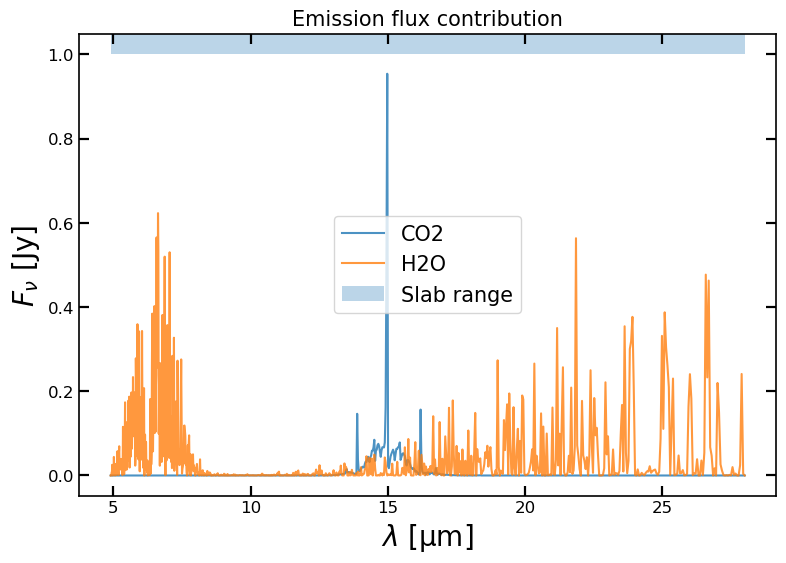

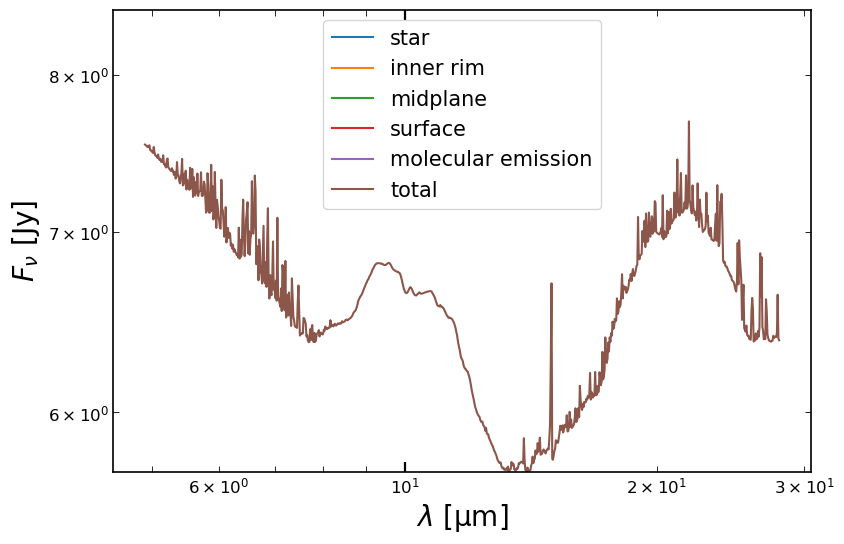

In [37]:

mod.run_model(variables=var_dict,dust_species=abundance_dict,absorp_species={},slab_dict=slab_dict,output_all=False,timeit=True)
mod.plot() #this plots the final model


In [38]:
mod=complete_model()

In [39]:
#wavelength=10**np.linspace(np.log10(4),np.log10(30),5000)
print(len(wavelength))
mod.read_data(variables=var_dict,dust_species={},absorp_species=abundance_dict_absorption,slab_dict=slab_dict,wavelength_points=wavelength,
              slab_prefix='12_',save_binned_data=True,load_binned_data=True,slab_folder=slab_folder,dust_path=dust_path,ext_model=ext_model)


873
Folder to be searched for pre-binned data:
['/data/tk502/LineData//binned_data/0', '/data/tk502/LineData//binned_data/1', '/data/tk502/LineData//binned_data/10', '/data/tk502/LineData//binned_data/11', '/data/tk502/LineData//binned_data/12', '/data/tk502/LineData//binned_data/2', '/data/tk502/LineData//binned_data/3', '/data/tk502/LineData//binned_data/4', '/data/tk502/LineData//binned_data/5', '/data/tk502/LineData//binned_data/6', '/data/tk502/LineData//binned_data/7', '/data/tk502/LineData//binned_data/8', '/data/tk502/LineData//binned_data/9']
Searching:
/data/tk502/LineData//binned_data/0/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/1/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/10/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/11/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/12/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/2/wavelength.npy
True
-----------------------------
Found p

Init 4.124641418457031e-05
Star 8.893013000488281e-05
Inner rim 0.00048470497131347656
Midplane 0.0009555816650390625
Surface 0.0006935596466064453
Emission 0.0007698535919189453
Summing up 4.124641418457031e-05


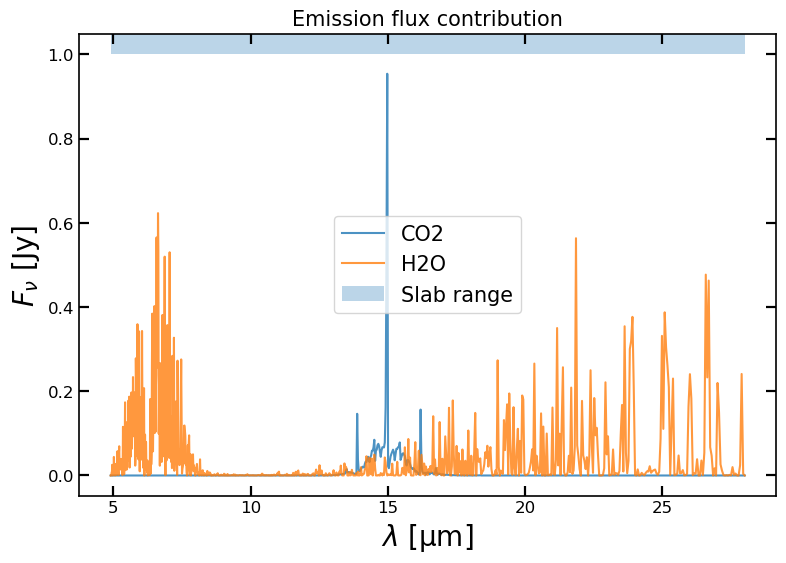

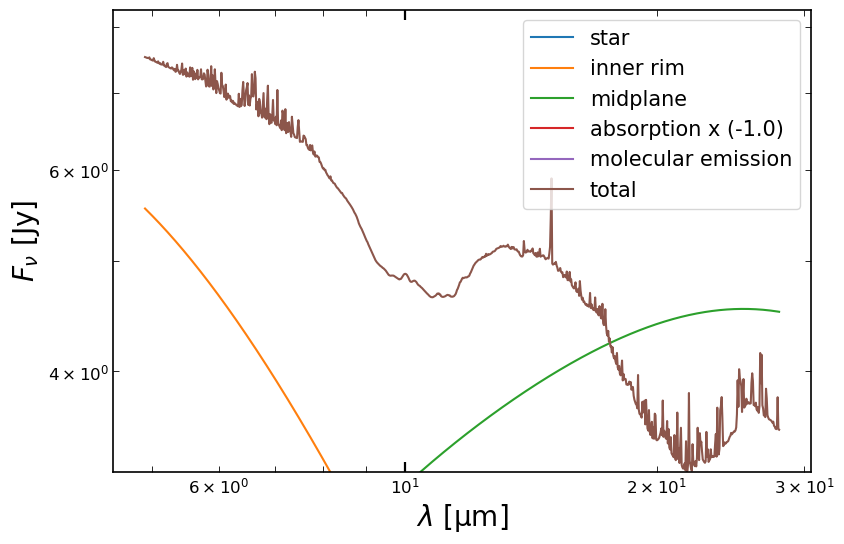

In [40]:

mod.run_model(variables=var_dict,dust_species={},absorp_species=abundance_dict_absorption,slab_dict=slab_dict,output_all=False,timeit=True)
mod.plot() #this plots the final model


In [41]:
mod.calc_dust_masses(dust_path=dust_path,unit='msun',absorption=True)

{'MgOlivine0.1.Combined.Kappa_rv0.1.dat': 8.248652177652696e-07,
 'MgOlivine2.0.Combined.Kappa_rv2.0.dat': 1.6497304355305388e-05,
 'MgOlivine5.0.Combined.Kappa_rv5.0.dat': 4.124326088826348e-05,
 'MgPyroxene0.1.Combined.Kappa_rv0.1.dat': 7.114740422773215e-07,
 'MgPyroxene2.0.Combined.Kappa_rv2.0.dat': 1.422948084554643e-05,
 'MgPyroxene5.0.Combined.Kappa_rv5.0.dat': 3.557370211386607e-05,
 'Silica0.1.Combined.Kappa_rv0.1.dat': 4.913617604477751e-07,
 'Silica2.0.Combined.Kappa_rv2.0.dat': 9.827235208955502e-06,
 'Silica5.0.Combined.Kappa_rv5.0.dat': 2.4568088022388755e-05,
 'Enstatite0.1.Combined.Kappa_rv0.1.dat': 6.225397869926562e-07,
 'Enstatite2.0.Combined.Kappa_rv2.0.dat': 1.2450795739853124e-05,
 'Enstatite5.0.Combined.Kappa_rv5.0.dat': 3.112698934963281e-05,
 'Forsterite0.1.Combined.Kappa_rv0.1.dat': 7.337076060984878e-07,
 'Forsterite2.0.Combined.Kappa_rv2.0.dat': 1.4674152121969754e-05,
 'Forsterite5.0.Combined.Kappa_rv5.0.dat': 3.668538030492439e-05}

In [42]:
# creating two dictionaries with the same dust species as above but without the values
abundance_dict_new={}
for key in abundance_dict:
    abundance_dict_new[key]=None
abundance_dict_absorption_new={}
for key in abundance_dict_absorption:
    abundance_dict_absorption_new[key]=None
var_dict_new=var_dict.copy()
var_dict_new['sc_ir']=None
var_dict_new['sc_mid']=None

In [49]:
mod2=complete_model()
mod2.read_data(variables=var_dict,dust_species={},absorp_species=abundance_dict_absorption_new,slab_dict=slab_dict,wavelength_points=wavelength,
              slab_prefix='12_',save_binned_data=True,load_binned_data=True,slab_folder=slab_folder,dust_path=dust_path,ext_model=ext_model)


Folder to be searched for pre-binned data:
['/data/tk502/LineData//binned_data/0', '/data/tk502/LineData//binned_data/1', '/data/tk502/LineData//binned_data/10', '/data/tk502/LineData//binned_data/11', '/data/tk502/LineData//binned_data/12', '/data/tk502/LineData//binned_data/2', '/data/tk502/LineData//binned_data/3', '/data/tk502/LineData//binned_data/4', '/data/tk502/LineData//binned_data/5', '/data/tk502/LineData//binned_data/6', '/data/tk502/LineData//binned_data/7', '/data/tk502/LineData//binned_data/8', '/data/tk502/LineData//binned_data/9']
Searching:
/data/tk502/LineData//binned_data/0/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/1/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/10/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/11/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/12/wavelength.npy
True
Searching:
/data/tk502/LineData//binned_data/2/wavelength.npy
True
-----------------------------
Found pre-b

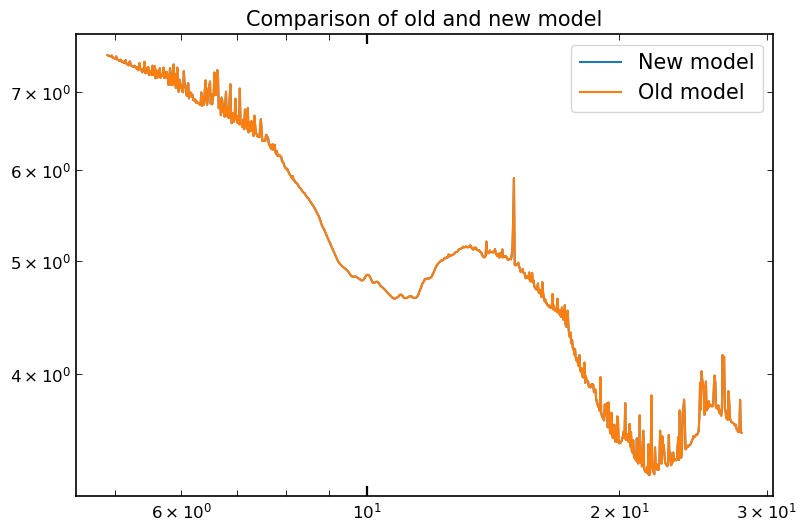

In [50]:
tot_flux_new=mod2.run_fitted_to_obs(variables=var_dict,dust_species={},absorp_species=abundance_dict_absorption_new,slab_dict=slab_dict,flux_obs=mod.tot_flux,lam_obs=mod.xnew,interp=False,debug=False)
plt.title('Comparison of old and new model')
plt.loglog(mod2.xnew,tot_flux_new,label='New model')
plt.loglog(mod.xnew,mod.tot_flux,label='Old model')
plt.legend()
plt.show()

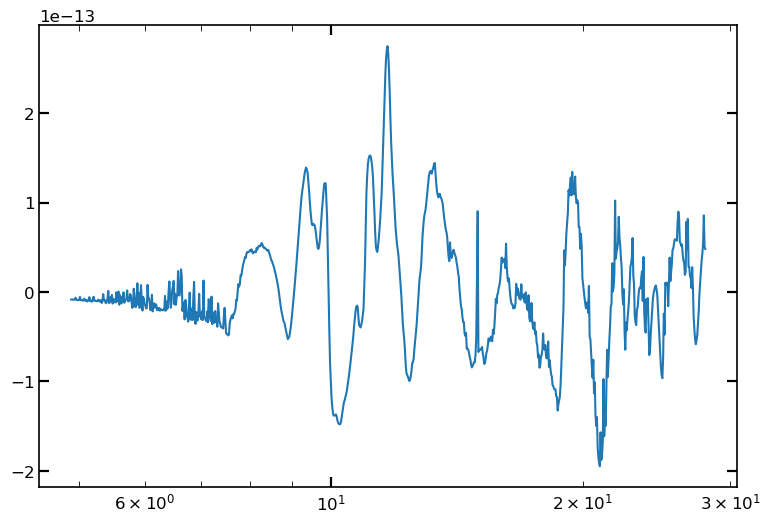

In [51]:
plt.plot(mod.xnew,(mod.tot_flux-tot_flux_new)/tot_flux_new,label='Difference')
plt.xscale('log')
plt.show()

In [52]:
print('Determined scale factors')
print(mod2.scaleparas)

Determined scale factors
[1.00000000e-16 1.00000000e-06 9.99999998e-08 1.00000000e-07
 1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
 1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
 1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
 1.00000000e-07 9.00000000e-02 9.00000000e-02]


In [37]:
#np.save('./Observations/mock_observation_dust_absorp_flux',mod.tot_flux)
#np.save('./Observations/mock_observation_dust_absorp_wave',mod.xnew)

# Others

There are more modes that you can run, like just the slab part of the model.  
I'll create tutorials on that later